<a href="https://colab.research.google.com/github/sflmnt/Business-Intelligence/blob/main/Reto3_Sof%C3%ADaLomanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reto 3: Sofía Lomanto**

Objetivo: implementar un modelo un modelo K-Means para determinar si una persona tiene una enfermedad cardiaca o no, utilizando las variables
* **Age:** La edad del paciente
* **Systolic:** La presión arterial sistólica
* **Diastolic:** La presión arterial diastólica
* **BMI:** El índice de masa corporal
* **Disease:** Indicador de si el paciente tiene o no una enfermedad cardíaca (Disease = 1 si tiene una enfermedad cardíaca, 0 en caso contrario)

0. Se cargan las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se procede con la implementación del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se cargan los datos

,Age,Systolic,Diastolic,BMI,Disease
0,44,112,111,17,0
1,55,128,90,27,1
2,47,131,94,26,1
3,31,151,104,17,0
4,65,148,117,17,1
...,...,...,...,...,...
175,43,119,76,25,0
176,63,107,113,40,1
177,47,116,61,27,0
178,70,110,88,24,0


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

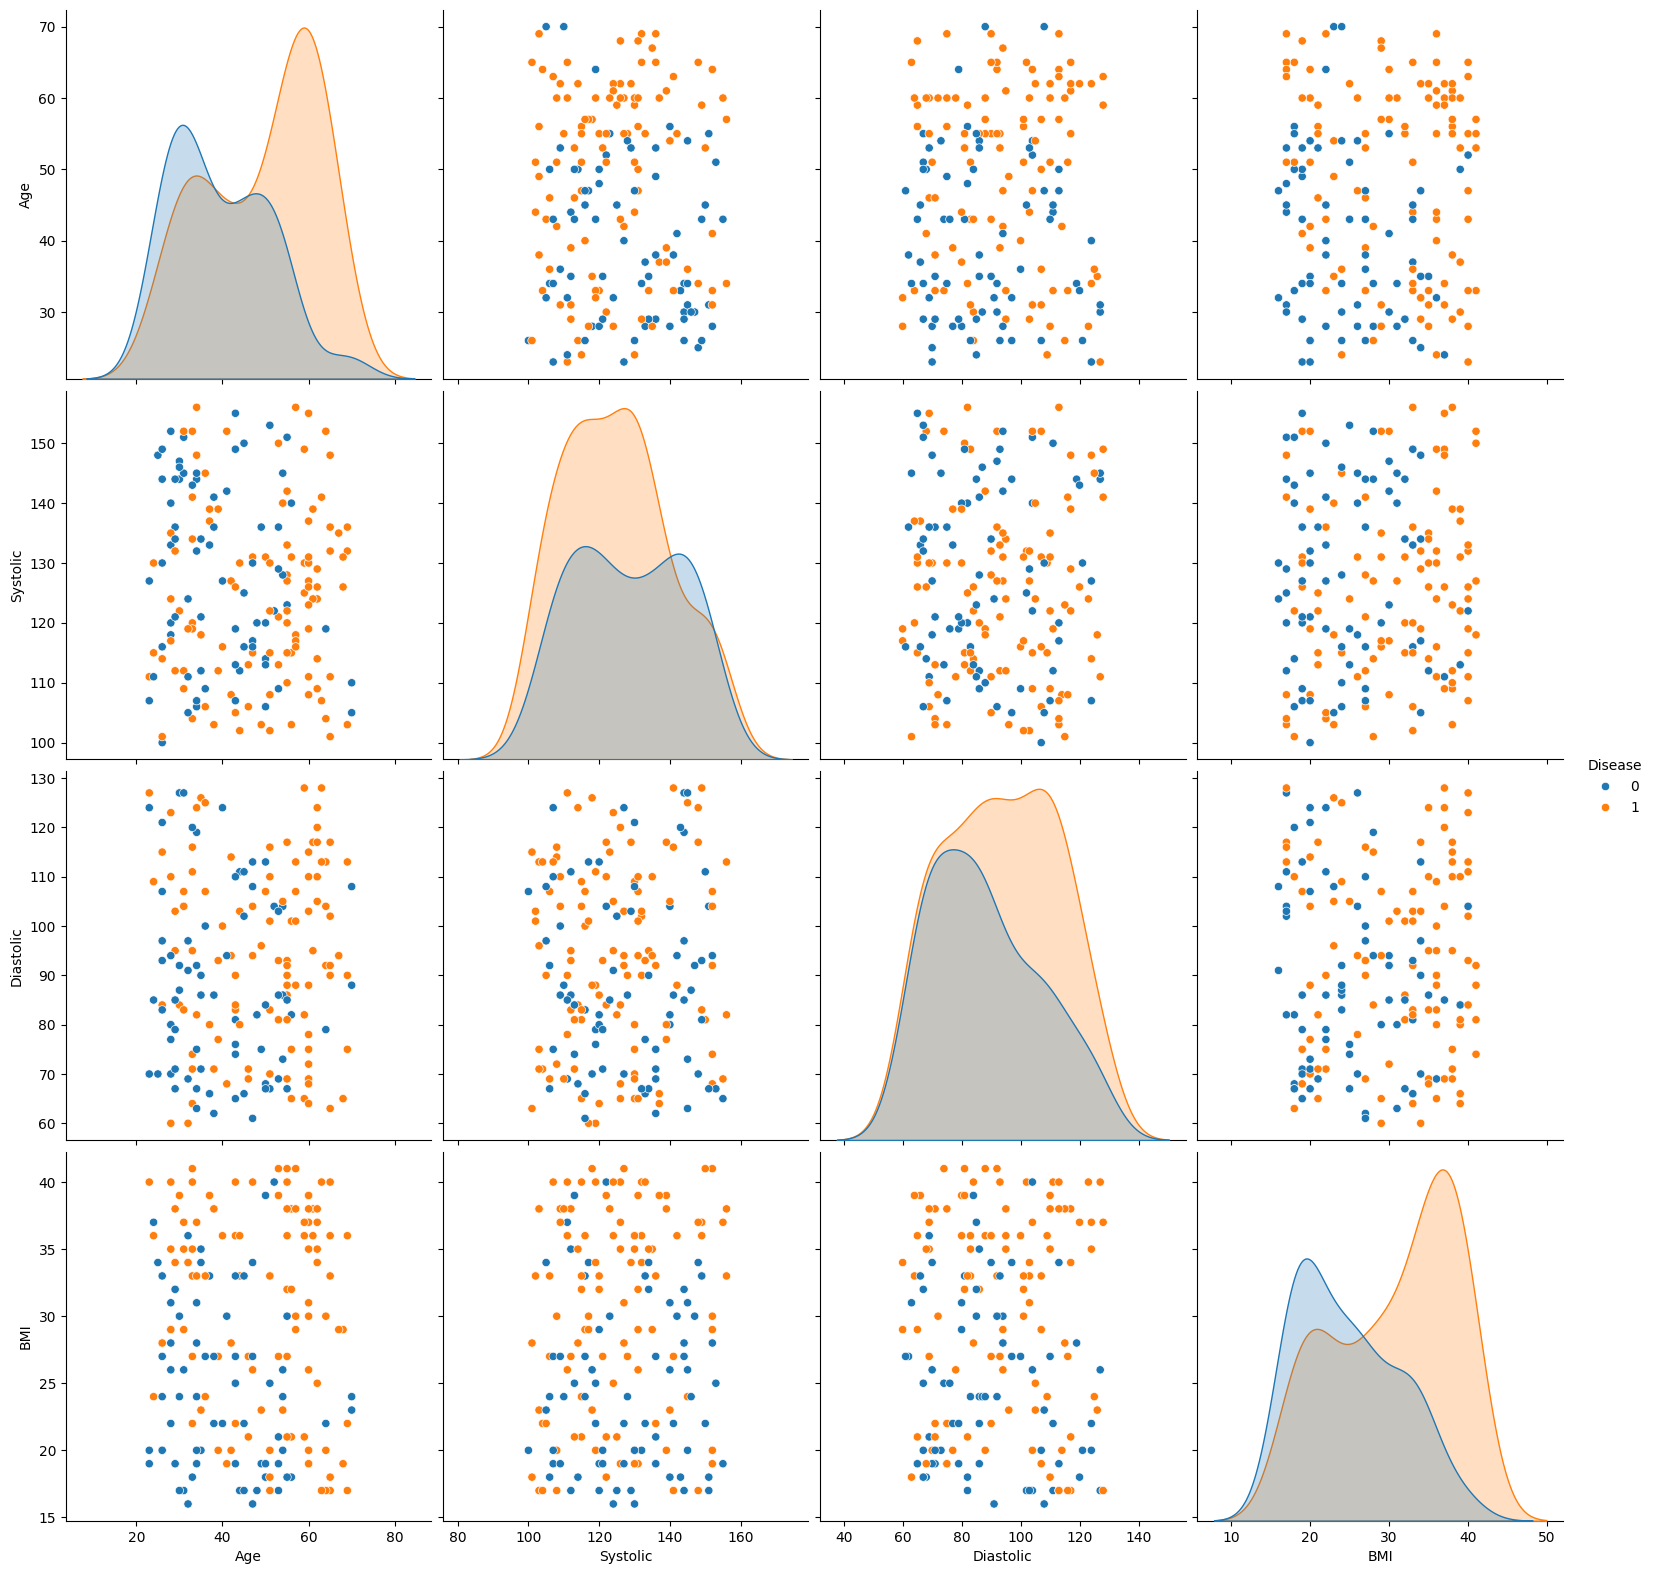

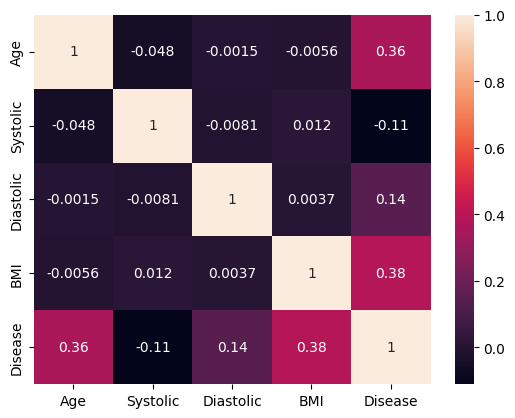

In [ ]:
nxl='/content/drive/MyDrive/Análitica 2025-1/3. BD2-HeartData_M_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB[['Age','Systolic','Diastolic','BMI','Disease']]
XDB.dropna()
display(XDB)

#Para mirar correlaciones y variables importantes
plt.figure()
sns.pairplot(XDB,hue='Disease',size=4,vars=['Age','Systolic','Diastolic','BMI']) #EL # de variables y el nombre
plt.show()

#Cuales son las correlaciones (mientras más cercano a 1 , más correlación)
plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()

2. Se procede con la implementación del modelo de clusterización

In [ ]:
XD= XDB[['Age','Systolic','Diastolic','BMI',]]
yd= XDB['Disease']

#Se van a crear 5 montoncitos de datos (perfiles de crédito)
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=nc,random_state=42)
mkm.fit(XD,yd)
centroids=mkm.cluster_centers_
print("los centroides son :\n",centroids)

#como quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels #Adicione a la tabla el cluster al que pertenece un solicitante
display(XDB)

#Caracterizamos los centroides
ND=np.bincount(labels)
print("El tamaño de los clusters es:\n",ND)
NSEC=XDB.groupby('labels').agg({"Disease":lambda x:(x==1).sum()}) #NSEC = Número (de personas que ) Si (tienen) enfermedad cardiaca
NNEC=XDB.groupby('labels').agg({"Disease":lambda x:(x==0).sum()}) #NNEC = Número (de personas que ) No (tienen) enfermedad cardiaca
print("El número de personas con enfermedad cárdiaca es:\n",NSEC)
print("El número de personas sin enfermedad cárdiaca es:\n",NNEC)

#Se procede con la estimación de los porcentajes enfermedad o no
NSEC['Disease']=NSEC['Disease']/ND
NNEC['Disease']=NNEC['Disease']/ND
print("El porcentaje de personas con enfermedades cárdiacas por cluster es:\n",NSEC)
print("El porcentaje de personas sin enfermedades cárdiacas por cluster es:\n",NNEC)

los centroides son :
 [[ 39.36111111 113.30555556  74.5         26.63888889]
 [ 57.90697674 126.74418605  84.37209302  30.34883721]
 [ 44.68965517 139.93103448 114.75862069  26.55172414]
 [ 37.35294118 143.76470588  77.76470588  28.91176471]
 [ 44.63157895 111.76315789 109.36842105  28.76315789]]


,Age,Systolic,Diastolic,BMI,Disease,labels
0,44,112,111,17,0,4
1,55,128,90,27,1,1
2,47,131,94,26,1,1
3,31,151,104,17,0,2
4,65,148,117,17,1,2
...,...,...,...,...,...,...
175,43,119,76,25,0,0
176,63,107,113,40,1,4
177,47,116,61,27,0,0
178,70,110,88,24,0,1


El tamaño de los clusters es:
 [36 43 29 34 38]
El número de personas con enfermedad cárdiaca es:
         Disease
labels         
0            16
1            36
2            18
3            10
4            27
El número de personas sin enfermedad cárdiaca es:
         Disease
labels         
0            20
1             7
2            11
3            24
4            11
El porcentaje de personas con enfermedades cárdiacas por cluster es:
          Disease
labels          
0       0.444444
1       0.837209
2       0.620690
3       0.294118
4       0.710526
El porcentaje de personas sin enfermedades cárdiacas por cluster es:
          Disease
labels          
0       0.555556
1       0.162791
2       0.379310
3       0.705882
4       0.289474


3. Se procede a evaluar el modelo (matriz de confusión)

In [ ]:
ydp=np.zeros((len(XD),1))
Vsec=np.array(NSEC); Vnec=np.array(NNEC)

for k in range(len(XD)):
  nsec=labels[k]
  print("La persona tal:",k)
  print("El cluster al que pertenece es:",nsec)
  print("El porcentaje de tener una enfermedad cárdiaca es:",Vsec[nsec])
  print("El porcentaje de no tener una enfermedad cárdiaca es:",Vnec[nsec])

#Consolidamos la información de los Aprobados y Negadps
  if Vsec[nsec]>Vnec[nsec]:
    ydp[k]=1
  else:
    ydp[k]=0


#Se evalua el modelo
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)

VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Exactitud=(VN+VP)/(VN+FP+FN+VP)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precision=VP/(VP+FP)
TasaError=(FP+FN)/(VN+FP+FN+VP)

print("La exactitud es:",Exactitud)
print("La sensibilidad es:",Sensibilidad)
print("La especificidad es:",Especificidad)
print("La precisión es:",Precision)
print("La tasa de error es:",TasaError)


La persona tal: 0
El cluster al que pertenece es: 4
El porcentaje de tener una enfermedad cárdiaca es: [0.71052632]
El porcentaje de no tener una enfermedad cárdiaca es: [0.28947368]
La persona tal: 1
El cluster al que pertenece es: 1
El porcentaje de tener una enfermedad cárdiaca es: [0.8372093]
El porcentaje de no tener una enfermedad cárdiaca es: [0.1627907]
La persona tal: 2
El cluster al que pertenece es: 1
El porcentaje de tener una enfermedad cárdiaca es: [0.8372093]
El porcentaje de no tener una enfermedad cárdiaca es: [0.1627907]
La persona tal: 3
El cluster al que pertenece es: 2
El porcentaje de tener una enfermedad cárdiaca es: [0.62068966]
El porcentaje de no tener una enfermedad cárdiaca es: [0.37931034]
La persona tal: 4
El cluster al que pertenece es: 2
El porcentaje de tener una enfermedad cárdiaca es: [0.62068966]
El porcentaje de no tener una enfermedad cárdiaca es: [0.37931034]
La persona tal: 5
El cluster al que pertenece es: 3
El porcentaje de tener una enfermedad

4. Se evalúa una persona

El cluster al que pertenece la persona es: [3]
El porcentaje de tener una enfermedad Cárdiaca es: [[0.29411765]]
El porcentaje de no tener una enfermedad Cárdiaca es: [[0.70588235]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


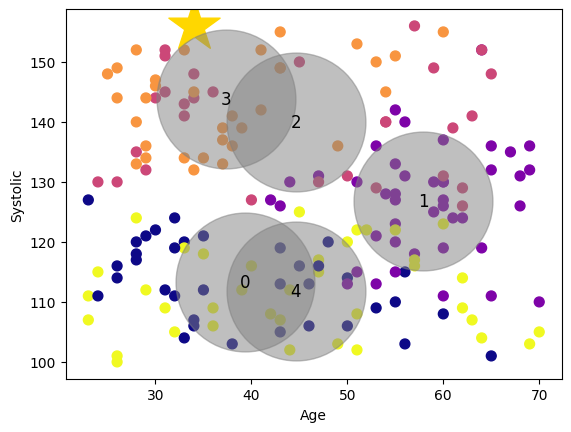

In [ ]:
XDn=([(34,156,82,33)])
ydn= mkm.predict(XDn)
print("El cluster al que pertenece la persona es:",ydn)
print("El porcentaje de tener una enfermedad Cárdiaca es:",Vsec[ydn])
print("El porcentaje de no tener una enfermedad Cárdiaca es:",Vnec[ydn])

plt.scatter(XD.iloc[:,0],XD.iloc[:,1],c=labels,s=50,cmap='plasma')
# Accessing elements of XDn using list indexing
plt.scatter(XDn[0][0],XDn[0][1],marker='*',s=1500,facecolors='gold')
plt.scatter(centroids[:,0],centroids[:,1],alpha=0.5,marker='o',s=10000,facecolors='grey')

for i,c in enumerate(centroids):
  plt.text(c[0],c[1],str(i),fontsize=12,color='black',ha='center',va='center')

plt.xlabel('Age')
plt.ylabel('Systolic')
plt.show()

# **Análisis de resultados:**
Para la clasificación de datos mediante el metodo de clusterización (KMeans) se tomaron un total de 4 variables de entrada (Edad, Presión Sistólica, Presión Diastólica y el índice de masa corporal) y se tomo una variable explicativa determinada por la existencia de enfermedades cárdiacas o no (Variable "Disease").

Para este modelo, se tomaron un total de 5 cluster como referencia, esto con el fin de asociar cada cluster a 5 valores cualitativos (Muy bajo, bajo, Medio, Alto y Muy Alto)en función de la catidad de datos que estos agrupan. De esta manera se encontro que la variable que tenía mayor relevancia con respecto a la variable 'Disease' era la variable 'BMI' con una correlación cercana al 38%, seguidamente también está la variable 'Edad' que tuvo una correlación con 'Disease' de 36%. También es importante aclarar que de las variables de entrada, las dos que más tienen correlación son 'Age' y 'Systolic' con una correlación de -4,8%.

De el total de datos (180), aproximadamente el 60% de los pacientes (107 pacientes) tienen o tendrán enfermedades cárdiacas, en cuanto a la estructura de los clusters (0,1,2,3,y 4) también encontramos que estan conformados por 36,43,29,34 y 38 personas respectivamente y de ellos podemos concluir que el cluster con una mayor edad es el cluster 1 (con 57.90 años aproximadamente), el cluster con la mayor presión sistólica es el cluster 3 (con 143.76 aproximadamente), El cluster con la menor presión diastólica es el cluster 0 (con 74.5) y finalmente el cluster con el menor índice de masa corporal es el cluster 2 (con 26.55 aproximadamente). Este último confirma lo que vimos anteriormente, que el índice de masa corporal tiene la mayor correlación con la determinación de la enfermedad cárdiaca.

Por último, es importante destacar que la exactitud alcanzada por el modelo fue de aproximadamente 70% (69,4%). Con respecto a el comportamiento encontrando enfermedades cárdiacas, el modelo obtuvo una sensibilidad del 75% en promedio (75,7%) lo que muestra su buen comportamiento en este sentido. Por otra parte la especificidad alcanzada por el modelo es de 60,3% aproximadamente y su precisión alcanza el 74% aproximadamente (73,6%).